# Decision Tree

#### Importando bibliotecas

In [1]:
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from  sklearn . tree  import   DecisionTreeClassifier 
from urllib.request import urlopen 
from sklearn.metrics  import   accuracy_score 
from sklearn import tree 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [2]:
def report_teste(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_teste, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_teste,predictions)))
    
def report_treino(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_treino, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_treino,predictions)))

#### Dados

In [3]:
dataset = pd.read_csv('C:\\Users\\Fabiel Fernando\\Desktop\\PROVA\\classificacao_Q4.csv')
dataset.columns
names = dataset.columns
names_index = names[0:100]
names_index

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99'],
      dtype='object')

In [4]:
#Verificando a existência de missings
#dataset.apply(lambda x: x.isnull().sum())

In [5]:
dataset.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.696199,-0.792598,-0.349427,-0.464560,3.187014,0.035976,1.033274,-1.504968,0.204693,1.691204,-0.148668,-4.074097,-0.032896,-0.663494,-0.386016,-0.237805,-1.510523,-1.570864,-0.368605,0.812503,0.549905,-0.730260,0.761423,1.128273,-1.763750,0.579692,-0.293674,0.295500,-0.427231,-0.295434,-2.626552,-0.888908,0.360110,-3.085644,-0.945316,-0.904486,1.072223,1.778115,-0.148051,0.634574,0.209628,0.561244,-0.586968,-3.702351,-0.649087,0.066648,0.521637,-0.318873,-0.964632,-0.068293,-1.941717,0.011300,-0.030974,1.666534,1.907174,0.454065,0.157899,-1.415378,-0.220428,-1.163591,0.643701,-0.593975,-0.230020,2.142668,-1.150896,1.980677,1.115755,0.511176,-0.526043,-0.492225,1.291322,-0.795223,1.292448,0.804562,0.822480,-1.205006,-0.280887,-1.364098,0.312000,-1.925461,0.498012,0.371394,0.176175,0.547430,1.058247,0.503351,1.018997,0.221213,-0.419000,-0.858737,-0.534360,1.488142,-0.686337,2.084970,-0.685140,-2.049451,2.015426,1.158477,-0.309441,-1.549833,4.0
1,-0.236696,-2.202342,0.024023,1.497700,-0.069758,-2.467088,1.126529,-0.570557,2.079251,-1.882632,-0.827576,1.005103,-0.137394,1.189628,-0.851586,-1.288871,-0.963559,1.227582,0.715197,0.520097,0.588903,-0.590111,-2.210356,1.022461,-1.039452,-0.241972,0.282824,0.001147,-1.621286,-1.815760,0.663234,-0.208910,0.113045,2.046566,0.761385,1.412045,2.094611,-0.286475,0.718189,-0.421027,1.182153,0.379603,-0.835262,0.937721,0.114378,-0.651730,-0.047160,3.589095,-0.486826,2.847869,0.162564,-0.039426,0.462479,-1.531158,-1.860289,0.455750,2.220489,1.212844,-1.329690,-1.452428,0.053086,-0.574263,-2.518650,-1.737640,-0.194589,0.648973,-0.342163,-0.508209,0.947281,-0.430554,0.661217,-1.936414,-1.698198,-3.313671,-0.183713,-0.549041,1.280620,2.177973,0.706155,-1.002186,-0.760492,0.390230,1.652978,-0.281058,-2.274763,-1.451749,-0.594344,1.292452,1.066120,0.036062,0.498207,0.405567,0.509564,1.374071,-0.016943,-0.429280,-0.895016,1.259566,-0.354139,0.806797,5.0
2,-0.436683,1.563816,-0.895999,-0.580425,0.311060,-0.187369,0.805249,-2.399522,-0.578818,1.586981,-1.941955,-0.596377,-0.489321,-1.030148,-0.485569,0.902347,0.107147,-0.780838,0.402332,-1.450170,-0.583627,-0.706544,-0.025883,-1.450107,2.118729,1.015845,0.166787,-0.044010,-0.360155,0.101155,-0.799201,-1.102617,2.115397,-2.361777,0.525674,-1.911165,0.123961,-0.417771,0.548105,-0.217684,-0.431924,-0.442644,-1.489144,-1.000744,0.862522,-0.563455,0.588636,0.010576,-0.456408,-1.428348,0.216525,1.290350,-1.092070,0.522418,2.553921,0.087687,1.755408,-1.382265,0.032006,0.680842,0.911192,0.505370,-0.741637,0.980315,2.359120,-0.380329,0.234811,2.287361,-0.568738,-1.932310,-1.912456,-1.829811,-0.589138,0.473086,-0.237060,-0.106093,-0.690060,-0.640960,-1.088658,-0.998397,-1.579437,-0.697638,-0.620487,-0.320028,1.390414,0.449638,0.300941,-0.512526,0.656667,0.265771,-2.630024,0.933578,-1.285978,0.503162,0.204829,-0.753835,0.290033,1.721487,1.304518,0.478903,3.0
3,1.425908,0.400055,-0.305038,-0.930251,-2.214549,1.763379,-0.239868,-2.058891,-1.006533,-2.156839,-0.817310,3.135035,-1.046031,2.035231,0.307369,-0.831289,-0.263652,-1.479070,-0.675276,-0.222479,-0.441100,0.343649,0.210042,-2.030159,0.636847,-2.268783,1.066813,1.486655,0.665269,1.207031,3.549965,-0.026904,1.027441,1.979429,1.133188,1.709450,1.046510,1.397032,0.177327,-0.402179,-0.054244,-0.578126,-0.055127,2.794188,0.528181,-0.140851,-0.320488,-0.552952,-2.406692,0.054562,0.886823,-0.419061,-0.272393,-2.141239,-0.114749,0.230638,-0.250862,1.116209,1.452902,0.927677,-0.136729,-0.873607,0.430335,0.828970,0.313719,0.378332,-0.586515,-1.448876,-0.149765,-0.958114,-1.478115,-2.388252,-1.569214,-2.755844,-1.098166,1.4504

In [6]:
print("Dimensão dos nossos dados:\n", 
     dataset.shape)
#print("Tipo de variáveis:\n",
#     dataset.dtypes)

Dimensão dos nossos dados:
 (1500, 101)


#### Pocentagem da variável resposta

In [7]:
resposta = dataset['target']
count = pd.DataFrame(resposta.value_counts())
percent = pd.DataFrame(resposta.value_counts(normalize = True)*100)
table = pd.concat([count, percent], axis = 1)
table.columns = ['# target', '% target']
table

,# target,% target
2.0,153,10.200000
8.0,153,10.200000
3.0,152,10.133333
0.0,150,10.000000
4.0,150,10.000000
1.0,149,9.933333
6.0,149,9.933333
9.0,149,9.933333
5.0,148,9.866667
7.0,147,9.800000


In [8]:
#Descritiva de algumas variáveis
#dataset.describe()

#### Treino e Teste

In [9]:
feature_space = dataset.iloc[:, dataset.columns != 'target']
feature_class = dataset.iloc[:, dataset.columns == 'target']


X_treino, X_teste, y_treino, y_teste = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 42)

In [10]:
# Limpar conjuntos de teste para evitar futuras mensagens de aviso
y_treino = y_treino.values.ravel() 
y_teste = y_teste.values.ravel() 

## Ajustando Decission Tree Classifier

In [11]:
#criterio = "gini"
criterio = "entropy"

In [12]:
classifier = DecisionTreeClassifier(criterion=criterio,
                                    max_depth=3,
                                    min_samples_leaf=5,
                                    random_state=42,
                                    max_leaf_nodes=None,
                                    min_impurity_split=None,
                                    class_weight=None,
                                    presort=False)
classifier.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

#### Precisão do classificador

In [13]:
pred_test = classifier.predict(X_teste)
pred_train = classifier.predict(X_treino)

#### Tabela com cálculo de vária métricas conjunto treino

In [14]:
report_treino(pred_train,'Decision tree')

Resultados para o classificador Decision tree:
Acurácia para o treino é  0.4123809523809524
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       103
        1.0       0.00      0.00      0.00        98
        2.0       0.00      0.00      0.00       111
        3.0       0.75      0.55      0.64       105
        4.0       0.33      0.76      0.46       104
        5.0       0.40      0.68      0.50        97
        6.0       0.38      0.50      0.43        98
        7.0       0.38      0.59      0.46       111
        8.0       0.39      0.62      0.48       106
        9.0       0.53      0.42      0.47       117

avg / total       0.32      0.41      0.34      1050
 None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Tabela com cálculo de vária métricas conjunto teste

In [15]:
report_teste(pred_test,'Decision tree')

Resultados para o classificador Decision tree:
Acurácia para o treino é  0.35555555555555557
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        47
        1.0       0.00      0.00      0.00        51
        2.0       0.00      0.00      0.00        42
        3.0       0.65      0.43      0.51        47
        4.0       0.27      0.72      0.39        46
        5.0       0.46      0.63      0.53        51
        6.0       0.47      0.49      0.48        51
        7.0       0.23      0.56      0.33        36
        8.0       0.33      0.43      0.37        47
        9.0       0.38      0.31      0.34        32

avg / total       0.28      0.36      0.30       450
 None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Ajustando o classificador com Grid Search

In [16]:
# random state para reproducibilidade
fit_dt = DecisionTreeClassifier(random_state=42)

In [17]:
np.random.seed(42)
cv_kfold = KFold(10, shuffle = False)

param_grid = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3], 
              'max_depth':[9,10],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }

In [18]:
cv_dt = GridSearchCV(fit_dt,
                     cv = cv_kfold,
                     param_grid = param_grid, 
                     n_jobs = 3)

In [19]:
cv_dt.fit(X_treino, y_treino)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'criterion': ('gini', 'entropy'), 'min_samples_split': [2, 3], 'max_depth': [9, 10], 'class_weight': ('balanced', None), 'presort': (False, True)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
cv_dt.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 3,
 'presort': False}

In [21]:
fit_dt.set_params(criterion = 'entropy',
                  class_weight = 'balanced',
                  max_features = 'auto', 
                  max_depth = 10,
                  presort = False)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [22]:
fit_dt.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

#### Resultados Conjunto Treino

In [23]:
pred_train2 = fit_dt.predict(X_treino)
report_treino(pred_train2, 'Decision Tree com Grid Search')

Resultados para o classificador Decision Tree com Grid Search:
Acurácia para o treino é  0.9676190476190476
             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97       103
        1.0       0.96      0.99      0.97        98
        2.0       0.95      0.95      0.95       111
        3.0       0.99      0.97      0.98       105
        4.0       0.98      1.00      0.99       104
        5.0       0.99      0.99      0.99        97
        6.0       0.96      0.89      0.92        98
        7.0       0.97      0.96      0.97       111
        8.0       0.94      0.95      0.95       106
        9.0       0.98      0.97      0.98       117

avg / total       0.97      0.97      0.97      1050
 None


#### Resultados conjunto teste

In [24]:
predictions_fit_dt = fit_dt.predict(X_teste)
report_teste(predictions_fit_dt, 'Decision Tree com Grid Search')

Resultados para o classificador Decision Tree com Grid Search:
Acurácia para o treino é  0.4888888888888889
             precision    recall  f1-score   support

        0.0       0.61      0.57      0.59        47
        1.0       0.39      0.37      0.38        51
        2.0       0.40      0.45      0.43        42
        3.0       0.61      0.64      0.62        47
        4.0       0.50      0.35      0.41        46
        5.0       0.48      0.47      0.48        51
        6.0       0.44      0.41      0.42        51
        7.0       0.49      0.58      0.53        36
        8.0       0.45      0.51      0.48        47
        9.0       0.54      0.59      0.57        32

avg / total       0.49      0.49      0.49       450
 None


#### Variáveis Importantes

In [25]:
def variable_importance(fit):
    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [26]:
var_imp_dt = variable_importance(fit_dt)
importances_dt = var_imp_dt['importance']
indices_dt = var_imp_dt['index']

In [27]:
def print_var_importance(importance, indices, name_index):
    print("Ranking das variáveis mais importantes:")
    for f in range(0, 5):
        i = f
        print("{0}. A variável '{1}' tem uma diminuição média na impureza de {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [28]:
print_var_importance(importances_dt, indices_dt, names_index)

Ranking das variáveis mais importantes:
1. A variável 'x53' tem uma diminuição média na impureza de 0.11414
2. A variável 'x97' tem uma diminuição média na impureza de 0.08743
3. A variável 'x41' tem uma diminuição média na impureza de 0.05727
4. A variável 'x77' tem uma diminuição média na impureza de 0.04418
5. A variável 'x1' tem uma diminuição média na impureza de 0.04006


In [29]:
predictions_dt = fit_dt.predict(X_teste)

In [30]:
print(confusion_matrix(y_teste, predictions_dt))

[[27  0  2  0  0  8  0  2  7  1]
 [ 0 19  2  4  4  2  8  3  6  3]
 [ 1  2 19  6  1  3  2  3  1  4]
 [ 0  5  1 30  1  0  1  4  1  4]
 [ 0 13  5  3 16  3  5  1  0  0]
 [ 6  5  4  2  0 24  5  0  1  4]
 [ 1  2  8  2  3  3 21  2  9  0]
 [ 4  2  0  1  0  3  1 21  4  0]
 [ 4  0  1  0  3  4  4  7 24  0]
 [ 1  1  5  1  4  0  1  0  0 19]]


In [31]:
accuracy_dt = fit_dt.score(X_teste, y_teste)

print("Aqui está a nossa precisão média no conjunto de testes: {0:.3f}".format(accuracy_dt))

Aqui está a nossa precisão média no conjunto de testes: 0.489


In [32]:
test_error_rate_dt = 1 - accuracy_dt
print("A taxa de erro de teste para o nosso modelo é: {0: .3f}" .format(test_error_rate_dt))

A taxa de erro de teste para o nosso modelo é:  0.511


### Curva ROC

In [33]:
predictions_prob = fit_dt.predict_proba(X_teste)[:, 1]

fpr2, tpr2, _ = roc_curve(y_teste,
                          predictions_prob,
                          pos_label = 1)

In [34]:
auc_dt = auc(fpr2, tpr2)

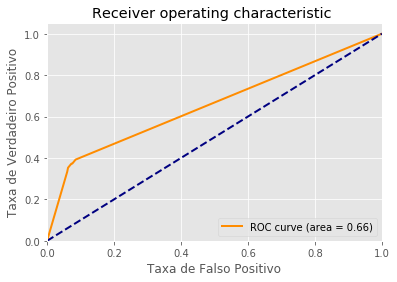

In [35]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

In [36]:
report_teste(predictions_dt, 'Decision Tree')

Resultados para o classificador Decision Tree:
Acurácia para o treino é  0.4888888888888889
             precision    recall  f1-score   support

        0.0       0.61      0.57      0.59        47
        1.0       0.39      0.37      0.38        51
        2.0       0.40      0.45      0.43        42
        3.0       0.61      0.64      0.62        47
        4.0       0.50      0.35      0.41        46
        5.0       0.48      0.47      0.48        51
        6.0       0.44      0.41      0.42        51
        7.0       0.49      0.58      0.53        36
        8.0       0.45      0.51      0.48        47
        9.0       0.54      0.59      0.57        32

avg / total       0.49      0.49      0.49       450
 None


## Validação Cruzada

### K - fold

In [37]:
X = dataset.iloc[:, 0:100].values
y = dataset['target'].astype('category')

In [38]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=42)
model = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.mean(), results.std()

(0.5353333333333332, 0.03155946767611901)

### LOOCV

In [ ]:
model = DecisionTreeClassifier()
accuracies = cross_val_score(model, X=X, y=y, cv=LeaveOneOut())
accuracies.mean()

### Repeat CV

In [ ]:
from sklearn.model_selection import RepeatedKFold
cv_repeat = RepeatedKFold(n_splits=6, n_repeats=3, random_state=42)
model = DecisionTreeClassifier()
accuracies = cross_val_score(model, X=X, y=y, cv=cv_repeat)
accuracies.mean()

### Separando as k primeiras observações para treino e o restante para teste

In [ ]:
X_treino = dataset.iloc[0:499, 0:99].values
y_treino = dataset.iloc[0:499, 100].values


X_teste = dataset.iloc[500:1500, 0:99].values
y_teste = dataset.iloc[500:1500, 100].values

In [ ]:
#criterio = 'gini'
criterio = 'entropy'

In [ ]:
clf = DecisionTreeClassifier(criterion=criterio,
                                    max_depth=3,
                                    min_samples_leaf=5,
                                    random_state=42,
                                    max_leaf_nodes=None,
                                    min_impurity_split=None,
                                    class_weight=None,
                                    presort=False)
clf.fit(X_treino, y_treino)

#### Precisão do classificador no Decision Tree

In [ ]:
pred_teste = clf.predict(X_teste)
pred_treino = clf.predict(X_treino)

#### Métricas Treino

In [ ]:
 report_treino(pred_treino, 'Decision Tree')

#### Métricas Teste

In [ ]:
report_teste(pred_teste, 'Decision Tree')